In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint

file = "BradleyMeltingPointDataset.xlsx"
data = pd.read_excel(file, usecols = ['smiles','mpC','donotusebecause'])
data = data[data.donotusebecause.isnull()]
exclude = data[data.donotusebecause.notnull()]
print ("the number of data point is ", data.shape)
print ("the number of exclude point is ", exclude.shape)


fp_case = 0
fp_len = 128

the number of data point is  (28268, 3)
the number of exclude point is  (0, 3)


In [2]:
all_smiles = data['smiles'].values
all_y = data['mpC'].values

print ("THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:")

smiles = []
y = []
for idx in range(len(all_smiles)):
    tsmiles = all_smiles[idx]
    tmol = Chem.MolFromSmiles(tsmiles, sanitize=False)
    problems = Chem.DetectChemistryProblems(tmol)
    if (len(problems)>0):
        print (tsmiles)
    else:
        smiles.append(tsmiles)
        y.append(all_y[idx])

THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:


RDKit ERROR: [07:29:54] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 23
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulize

[P+](c1ccccc1)(c1ccccc1)(c1ccccc1)C(=C=1C=CC=CC=1)c1ccccc1
O=C(OC)[C@@]2(C[C@H]4C[C@@](O)(CC)C[N@@](CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C=O)[C@@H]6[C@]98CCN7CC=C[C@@](CC)([C@@H](OC(C)=O)[C@]6(O)C(=O)OC)[C@H]78
CCN(CC)C(=O)[C@@H]2C=C1c3cccc4ncc(C[C@H]1N(C)C2)c34
O=C2c1ncnc1N(C)C(=O)N2C
Nc1ncnn1
c1cccc2ncnc12
Sc1nc2ccccc2n1
c1cccc2nnnc12
c1cncn1
c1cccc2nccc12
c1cccn1
n1c3ccccc3nc1c2cscn2
[O-][N+](=O)c1cnc(C)n1
Brc1cc2c3cc(Br)ccc3nc2cc1
Cc2cnc1ccccc12
Clc1cc2nc(C)nc2cc1
Cc1cc2nnnc2cc1
[O-][N+](=O)c1ccc2ncnc2c1
c1cccc2nc3ccccc3c12
COc1cc(cc(OC)c1OC)/C=C/C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccc(OC)cc6nc2[C@H]5C[C@@H]4[C@@H]([C@H]3OC)C(=O)OC
O=C(O)[C@@H](NC(C)=O)Cc2cnc1ccccc12
CC(=O)NC(=O)[C@@H](N)Cc2cnc1ccccc12
n2cnc(NCc1ccccc1)c3ncnc23
Cc1cnnc1
CCNC(=O)N(CCCN(C)C)C(=O)[C@@H]1C[C@@H]2c3cccc4ncc(C[C@H]2N(C1)CC=C)c34
O=C(O)[C@H](C(C)C)N(Cc1ccc(cc1)c2ccccc2c3nnnn3)C(=O)CCCC
CN=C(/NC#N)NCCSCc1ncnc1C
CCN(CC)CCc2cnc1ccccc12
CNS(=O)(=O)Cc1cc2c(cc1)ncc2CCN(C)C
CC=5OC(=O)OC=5COC(=O)c4c(nc(CCC)n4Cc1ccc(cc1)c

RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 12 13 14 15
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 45 46 47 48 49 50 51 52 53
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 5

Ic1cnnc1
Cc3c(OC)c(C)cnc3CS(=O)c1nc2ccc(cc2n1)OC
O=C2c1ncnc1N(C)C(=O)N2C
O=C2NC(=O)N(CCC)c1ncnc12
O=C(O)[C@@H](N)Cc2cnc1ccccc12
Cc1ccnc1
CN(C)CCc2cnc1ccccc12
COc4ccccc4OCCNCC(O)COc2cccc3nc1ccccc1c23
CC(=O)NCCc2cnc1ccc(cc12)OC
O=C(O)CCCc2cnc1ccccc12
C=CCN3CCCC3CNC(=O)c1cc2nnnc2cc1OC
CN(C)CCc2cnc1ccc(O)cc12
O=C(O)CC3(CC)OCCc2c3nc1c(cccc12)CC
Cc3c(OC)c(C)cnc3CS(=O)c1nc2ccc(cc2n1)OC
C[C@@H](CO)NC(=O)[C@@H]2C=C1c3cccc4ncc(C[C@H]1N(C)C2)c34
CC[C@@H](CO)NC(=O)[C@@H]2C=C1c3cccc4ncc(C[C@H]1N(C)C2)c34
O=C1C(CCc2nc(C)c(CC)c12)CN3CCOCC3
OCc4c(Cl)nc(CCCC)n4Cc1ccc(cc1)c2ccccc2c3nnnn3
O=C(N)c1ncnc1/N=N/N(C)C
Cc1cc2ncnc2cc1C
CSC[C@@H]1C[C@@H]2c3cccc4ncc(C[C@H]2N(C1)CCC)c34
O=C(OC)Nc1nc2ccc(cc2n1)SCCC
OC(=O)/C=C/c1cncn1
COc1cc(cc(OC)c1OC)C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccccc6nc2[C@H]5C[C@@H]4[C@H](C(=O)OC)[C@H]3OC
O=C(OC)[C@@]2(C[C@H]4C[C@@](O)(CC)CN(CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C)[C@@H]8[C@]97CCN6CC=C[C@](CC)([C@H]67)[C@@H](O)[C@]8(O)C(N)=O
O=C(OC)[C@H]2[C@@H](O)CC[C@H]3CN4CCc1c5ccccc5nc1[C@@H]4C[

RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 14
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [07:29:54] Can't kekulize mol.  Unkekulize

OCCc2cnc1ccccc12
O=P(O)(O)Oc1cccc2c1c(cn2)CCN(C)C
Cc1ncc(C)c1CC
CN(C)CCc2cnc1ccc(O)cc12
O=Cc2cnc1ccccc12
c1ccc(cc1)c2nc(c(n2)c3ccccc3)c4ccccc4
O=C(O)C(NC(=O)CCN)Cc1cncn1
CC(N)Cc2cnc1ccccc12
c1ncnn1
c1cncc2ncnc12
c1ccnc2nccc12
c1cccc2nncc12
c1cccc3c1ccc2nc4ccc5ccccc5c4c23
O=C(OC)[C@H]2[C@@H](O)CC[C@H]3CN4CCc1c5ccccc5nc1[C@@H]4C[C@H]23
Cc1cc2nnnc2cc1
O=C1N=C(N)Nc2nnnc12
O=C(O)CCCc2cnc1ccccc12
CCC(N)Cc2cnc1ccccc12
c1cccn1
Cc1cc2ccccc2n1
c1cccc2nnnc12
[O-][N+](=O)c1cc2ncnc2cc1
Cc1c2ccccc2nc1C
CN(C)Cc2cnc1ccccc12
c1cccc2nc3ccccc3c12
Cc2cnc1ccccc12
Cc1cc(C)nn1
CN(C)CCc2cnc1ccccc12
CNCCc2cnc1ccccc12
c1cccc2ncnc12
COc1cc(cc(OC)c1OC)C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccc(OC)cc6nc2[C@H]5C[C@@H]4[C@@H]([C@H]3OC)C(=O)OC
n1c3ccccc3nc1c2cscn2
O=C(OCC)Oc1c(OC)cc(cc1OC)C(=O)OC2CC3CN4CCc5c6ccc(OC)cc6nc5C4CC3C(C2OC)C(=O)OC
CNS(=O)(=O)Cc1cc2c(cc1)ncc2CCN(C)C
CS(=O)c3ccc(c1nc2ncccc2n1)c(OC)c3
Oc1cc2c(cc1)ncc2CCN
Cc3c(OCCCOC)ccnc3CS(=O)c1nc2ccccc2n1
CN(C)CCc2cnc1cccc(O)c12
CC(C)NCC(O)COc2cccc1nccc12
CSCC4CC1C(C

RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21 22 23 24 25 26 27 28 29
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10

C=CCN3CCCC3CNC(=O)c1cc2nnnc2cc1OC
[O-][N+](=O)c1cc2nnnc2cc1
n2cnc(NCc1ccccc1)c3ncnc23
Nc1ccc2c3ccccc3nc2n1
O=C3c5ccccc5N=C2c4nc1ccccc1c4CCN23
c1cccc3c1ccc2nc4ccccc4c23
c1cnnn1
c1nnnn1
FC(F)(F)c1nc2ccccc2n1
OC(=O)c1ncnc1C(O)=O
c1ccc(cc1)c2nccn2
O=C(O)c2cnc1ccccc12
Cc1cnc(C)n1
Cc1cnc(CC)n1
Cc1cccc2ccnc12
Cc1nc(C)c(C)c1C
Cc1cc2cc(C)nc2cc1
CC(=O)Cc2cnc1ccccc12
CC2NCCc1c3cc(OC)ccc3nc12
CC(C)NCC(O)COc2cccc1nc(C)cc12
c1ccc(cc1)c2cccn2
O=C(O)c1cc2ccccc2n1
O=C(OCC)c1cc2ccccc2n1
[O-][N+](=O)c1cc2nc(C)nc2cc1
Oc2cccc1nccc12
Ic1cnnc1
Nc1cnnc1
Nc1cc2ccnc2cc1
Brc1cnnc1C
Cc1cccc2nccc12
N#Cc3cncc3c1cccc2OC(F)(F)Oc12
Clc1ccc2ccnc2c1
Nc1cc2cnnc2cc1
Clc1cccc(c1Cl)c2cncc2C#N
CC[C@@]23CCc4nc1ccccc1c4CCN(C2)CCC3
Oc1ccc2c3ccccc3nc2c1
O=C(O)C(N)Cc2nnc1ccccc12
Clc2nnc1ccccc12
O=C(OCC)Cc2nnc1ccc(Cl)cc12
Cc1cccc2nnnc12
N#Cc2cnc1ccccc12
Cc1c3ccccc3nc1c2ccccc2
Clc1cc(C)nn1
N#CCc2cnc1ccccc12
O=C(O)C2C(OC)C(O)CC3CN4CCc1c5ccc(OC)cc5nc1C4CC23
O=C(OC)C2(CC4CC(O)(CC)CN(CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C)C8C97CCN6CC=CC(

RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 22 23 24 25
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 26 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 19
RDKit ERROR: 
RDKit ER

COc1ccc(cc1)CNC(=O)C(=O)c3cnc2ccc(cc23)[N+]([O-])=O
Oc1ccc(cc1)CNC(=O)C(=O)c3cnc2ccc(cc23)[N+]([O-])=O
COc1ccc3c(c1)nc2c3CCN=C2C
CC(CO)=CC1c3cccc2ncc(CC1NC)c23
Cc1ccc2nc(C)nc2c1
O=C(NC3CCN(CCc1cc2ccccc2n1)CC3)c4ccccc4
O=S(=O)(OC)ON(C)(C)(C)C(C)CN1c3ccccc3Sc2ccccc12
COC1CCC2CC3C4C=CC(O)C5OC1C2C45CCN3(Br)(C)C
O=C(OCC)C(Cc2cnc1ccccc12)N(C)C=O
O=C(N)c1ncnc1/N=N/N(C)C
BN(C)(C)C
CCCC[N](CCCC)(CCCC)CCCC
OC=1/C=C\CN(=O)C=1
FB(F)(F)O(CC)CC
O=C(OC(COP(O)(=O)OCCN(C)(C)C)COC(=O)CCCCCCCCCCCCCCC)CCCCCCCCCCCCCCC
OC(COP(O)(=O)OCCN(C)(C)C)CO
Cl[C@@]3(Cc2c1c(cccc1)nc2C[C@@H]3CCC#N)C
Clp2(Cl)np1(OCC(CO1)(C)C)np(Cl)(Cl)n2
O=C(OCc1c(C=O)ncc1)C
n1cnnc1
[O-][N+](=O)c1cnc(n1)C
n2c1ccccc1nc2C
O=C(O)\C=C\c2c1ccccc1nc2
S=C2/N=C\Nc1ncnc12
O=C(O)Cc2c1ccccc1nc2
O=C(O)[C@@H](N)Cc1cncn1


RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [07:29:55] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
RDKit ERROR: 


In [3]:
data = pd.DataFrame(list(zip(smiles, y)), columns = ['smiles', 'mpC'])
data['Mol'] = data['smiles'].apply(Chem.MolFromSmiles)

In [4]:
data.head()

,smiles,mpC,Mol
0,c1ccnc(c1)Cc2ccc(cc2[N+](=O)[O-])[N+](=O)[O-],92.0,<rdkit.Chem.rdchem.Mol object at 0x7f0604fd78a0>
1,c1ccc(c(c1)N)N2CCCCC2,46.0,<rdkit.Chem.rdchem.Mol object at 0x7f0604fd7d50>
2,c1cnc(nc1)N2CCNCC2,33.0,<rdkit.Chem.rdchem.Mol object at 0x7f0633b538a0>
3,c1ccc(c(c1)N2CCNCC2)O,125.0,<rdkit.Chem.rdchem.Mol object at 0x7f0633b53a30>
4,C1CCC(=CC1)CCN,-55.0,<rdkit.Chem.rdchem.Mol object at 0x7f0633b512b0>


In [5]:
from rdkit.Chem.rdMolDescriptors import *

from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs

In [6]:
from rdkit.Chem import rdqueries
def element_count(mol, Zelement):
    q = rdqueries.AtomNumEqualsQueryAtom(Zelement)
    return len(mol.GetAtomsMatchingQuery(q))

In [7]:
from sklearn.preprocessing import StandardScaler

def generate_fingerprint(mol, fp_case, fp_len):
    #print ("Using the fingerprint:")
    if (fp_case==0):
        #print ("Estate (1995)")
        return FingerprintMol(mol)[0]
    elif (fp_case==1):
        #print ("Morgan circular")
        return GetMorganFingerprintAsBitVect(mol, 2, fp_len)
    elif (fp_case==2):
        #print ("Atom pair (1985)")
        return GetHashedAtomPairFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==3):
        print ("Topological torsion (1987)")
        return GetHashedTopologicalTorsionFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==4):
        print ("Avalon bit based (2006)")
        return GetAvalonFP(mol, fp_len)
    elif (fp_case==5):
        print ("Avalon+mol. weight")
        return np.append(GetAvalonFP(mol, fp_len), Descriptors.MolWt(mol))
    elif (fp_case==6):
        print ("RDKit fingerprint")
        return RDKFingerprint(mol, fpSize=fp_len)
    elif (fp_case==7):
        print ("ErG fingerprint (2006)")
        return GetErGFingerprint(mol)


#Scale X to unit variance and zero mean
data['Fingerprint'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case, fp_len=fp_len)

fp_element_count = False
data['C_count'] = data['Mol'].apply(element_count, Zelement=6)
data['N_count'] = data['Mol'].apply(element_count, Zelement=7)
data['O_count'] = data['Mol'].apply(element_count, Zelement=8)
X1 = data[['C_count','N_count','O_count']].values

fp_add_fp2 = False
data['Fingerprint_2'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case+1, fp_len=fp_len)
X2 = np.array(list(data['Fingerprint_2']))
fp_add_fp3 = False
data['Fingerprint_3'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case+2, fp_len=fp_len)
X3 = np.array(list(data['Fingerprint_3']))

X = np.array(list(data['Fingerprint']))
if fp_element_count:
    X = np.concatenate((X,X1), axis=1)
if fp_add_fp2:
    X = np.concatenate((X,X2), axis=1)
if fp_add_fp3:
    X = np.concatenate((X,X3), axis=1)


st = StandardScaler()
X = st.fit_transform(X)

In [8]:
print ("The shape of the fingerprint is", X.shape)

The shape of the fingerprint is (27979, 79)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


<Figure size 432x288 with 0 Axes>

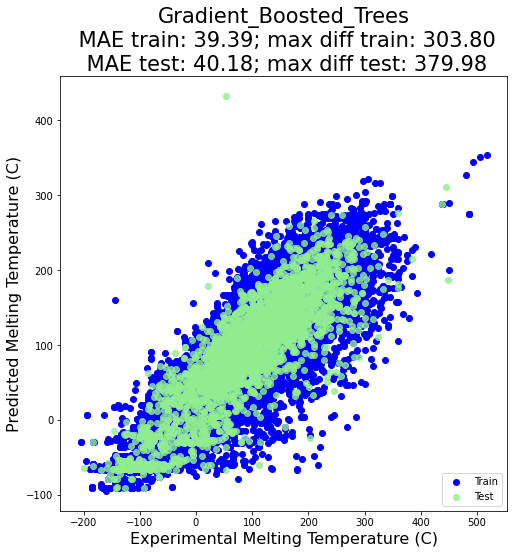

<Figure size 432x288 with 0 Axes>

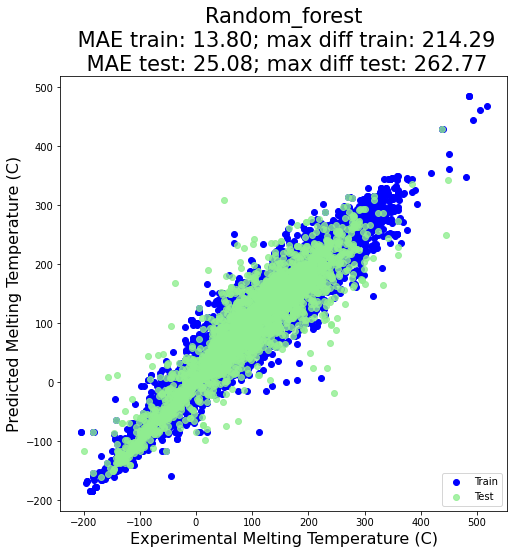

<Figure size 432x288 with 0 Axes>

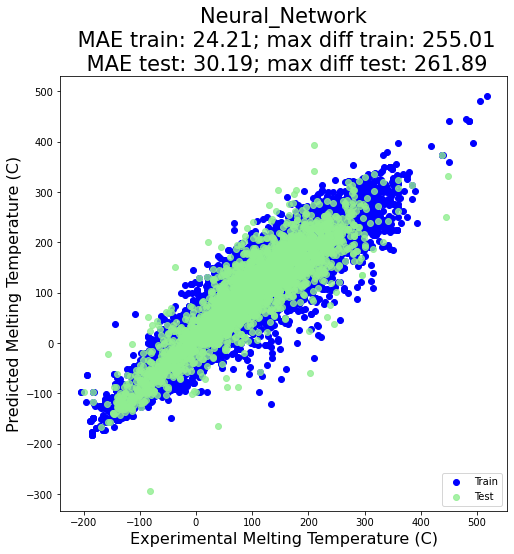

\begin{tabular}{c c c}
           name     &     test MAE err   & .    abs error in CV \\ 
\hline
                 Random_forest & 25.084 & 26.904 \\
                Neural_Network & 30.190 & 31.533 \\
        Gradient_Boosted_Trees & 40.185 & 40.758 \\
\end{tabular}


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

from sklearn.model_selection import cross_val_score

import pickle


def make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, title, figsize, fontsize, fname):    
    plt.clf()
    f = plt.figure(figsize=figsize)
    plt.scatter(y_train,y_pred_train, label = 'Train', c='blue')
    plt.title(title,fontsize=fontsize+5)
    plt.xlabel('Experimental Melting Temperature (C)', fontsize=fontsize)
    plt.ylabel('Predicted Melting Temperature (C)', fontsize=fontsize)
    plt.scatter(y_test,y_pred_test,c='lightgreen', label='Test', alpha = 0.8)
    plt.legend(loc=4)
    #plt.xlim(-200,500)
    #plt.ylim(-200,500)
    plt.show()
    f.savefig(fname+".pdf")

from sklearn.model_selection import train_test_split

def test_models_and_plot(x, y, model_dict, plots, fp_case, fp_len):
    ''' test a bunch of models and print out a sorted list of CV accuracies
        inputs: 
            x: training data features, numpy array or Pandas dataframe
            y: training data labels, numpy array or Pandas dataframe
            model_dict: a dictionary of the form {name : model()}, where 'name' is a string
                        and 'model()' is a scikit-learn model object. 
    '''

    mean_scores = {}
    percent_errors = {}
    
    for (name, model) in model_dict.items():
        #print("running %s" % name)
        scores = cross_val_score(model, x, y, cv=20, n_jobs=-1, scoring='neg_mean_absolute_error')
        scores = -1*scores
        mean_score = scores.mean()
        mean_scores[name] = mean_score

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
        model.fit(X_train, y_train)
        # save the model to disk
        filename = name + "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
        pickle.dump(model, open(filename, 'wb'))
        
        y_pred_train = model.predict(X_train)
        mae_train = np.mean(np.abs(y_train-y_pred_train))
        max_train = np.max(np.abs(y_train-y_pred_train))
        y_pred_test  = model.predict(X_test)
        mae_test = np.mean( np.abs(y_test -y_pred_test))
        max_test = np.max( np.abs(y_test -y_pred_test) )
        
        percent_errors[name] = mae_test

        #fulltitle = name+'\n MAE error: '+str(percent_error)
        fulltitle = name + \
            "\n MAE train: " +  str("{:.2f}".format(mae_train)) + "; max diff train: " +  str("{:.2f}".format(max_train)) + \
            "\n MAE test: " +  str("{:.2f}".format(mae_test)) + "; max diff test: " +  str("{:.2f}".format(max_test))
        

        if plots:
            fname = name + "_" + str(fp_case) + "_" + str(fp_len)
            make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, fulltitle, (8,8), 16, fname)

    sorted_names = sorted(percent_errors, key=mean_scores.__getitem__, reverse=False)

    print("\\begin{tabular}{c c c}")
    print("           name     &     test MAE err   & .    abs error in CV \\\\ ")
    print("\\hline")
    for i in range(len(sorted_names)):
        name = sorted_names[i]
        print("%30s & %5.3f & %5.3f \\\\" % (name, percent_errors[name], mean_scores[name]))
    print("\\end{tabular}")


alpha_grid = {'alpha': np.logspace(1e-11,1e-1,8)}

model_dict = {
            #'Linear_Regression': LinearRegression(),
            #'Kernel Ridge Regression': KernelRidge(),
            #'Ridge Regression':Ridge(),
            #'Gaussian Process Regressor': GaussianProcessRegressor(normalize_y=True),
            #'Support Vector Regression': SVR(),
            #'KNeighborsRegressor': KNeighborsRegressor(),
            'Gradient_Boosted_Trees': GradientBoostingRegressor(n_estimators=100),
            'Random_forest': RandomForestRegressor(n_estimators=100),
            'Neural_Network': MLPRegressor(alpha=0.01,max_iter=8000, hidden_layer_sizes=[80,60], early_stopping=False)
            }

test_models_and_plot(X, y, model_dict, plots=True, fp_case=fp_case, fp_len=fp_len)

In [11]:
import glob

filename = "A.txt"
print("read SMILES from file:", filename)
smiles = np.loadtxt(filename, dtype=str)

for tsmiles in smiles:
    print ("**********************************")
    print (tsmiles)
    tmol = Chem.MolFromSmiles(tsmiles)
    fp = generate_fingerprint(tmol, fp_case, fp_len)
    X = np.array(list(fp))
    
    X1 = []
    if fp_element_count:
        Zelement = 6
        X1.append(element_count(tmol, Zelement))
        Zelement = 7
        X1.append(element_count(tmol, Zelement))
        Zelement = 8
        X1.append(element_count(tmol, Zelement))
        X1 = np.array(X1)
        X = np.concatenate((X,X1), axis=0)
    if fp_add_fp2:
        fp_2 = generate_fingerprint(tmol, fp_case+1, fp_len)
        X2 = np.array(list(fp_2))
        X = np.concatenate((X,X2), axis=0)
    if fp_add_fp3:
        fp_3 = generate_fingerprint(tmol, fp_case+2, fp_len)
        X3 = np.array(list(fp_3))
        X = np.concatenate((X,X3), axis=0)

        
    nlen = X.shape[0]
    X = np.reshape(X, (1, nlen)) 
    print ("The shape of the fingerprint is", X.shape)
    X = st.transform(X)
    
    postname = "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
    files_model = glob.glob('*'+postname)
    for f in files_model:
        model = pickle.load(open(f, 'rb'))
        y_pred = model.predict(X)
        print (f, y_pred)


read SMILES from file: A.txt
**********************************
CC(CO[N+]([O-])=O)(CO[N+]([O-])=O)CO[N+]([O-])=O
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav [78.63222461]
Gradient_Boosted_Trees_0_128.sav [15.64787191]
Random_forest_0_128.sav [62.06472619]
**********************************
CCCC
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav [-153.49465747]
Gradient_Boosted_Trees_0_128.sav [-66.10975652]
Random_forest_0_128.sav [-137.81718643]
